# images_generation.ipynb

Code to generate images as shown in the poster. If it's not here, it was created in graphic design software.

### Setup

In [ ]:
!uv pip install matplotlib numpy

### Bragg's mirror (varying angle)

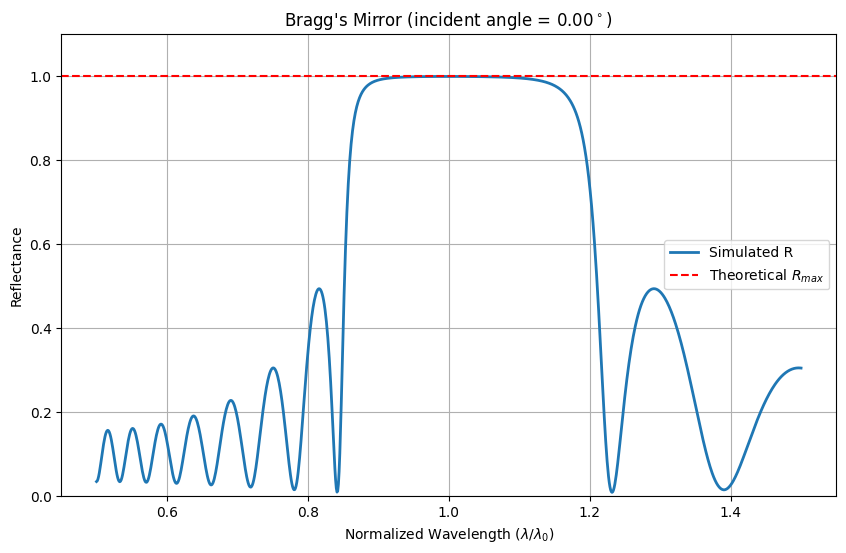

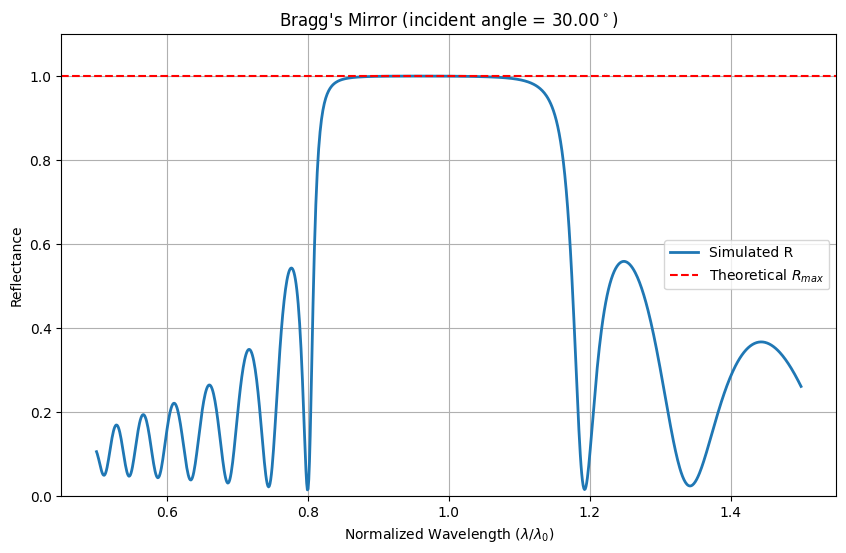

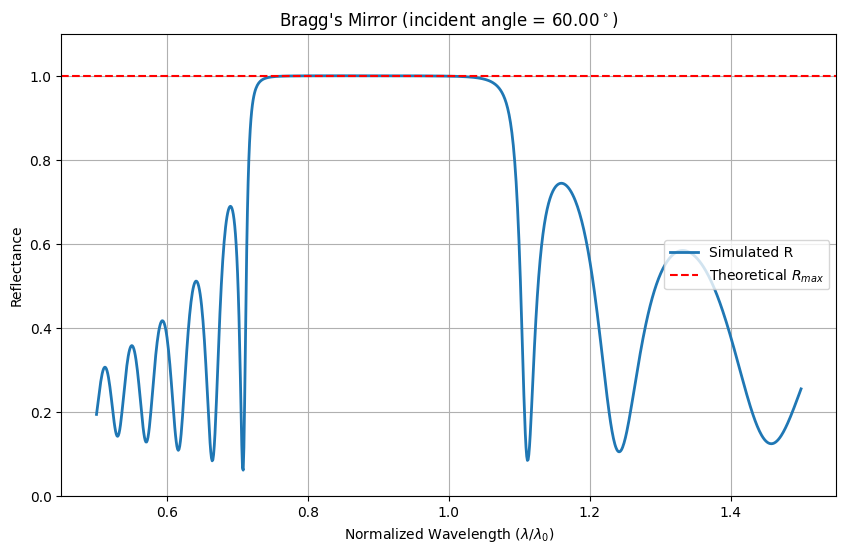

In [2]:
## Packages
import sys
sys.path.append("../Python/")
import matplotlib.pyplot as plt
from numpy import deg2rad, rad2deg
from Bragg import bragg

# Parameters
lam0 = 1.0
n_High = 2.3
n_Low = 1.45
n_inc = 1.0
n_sub = 1.45
m = 8
theta_i0s = [0, deg2rad(30), deg2rad(60)]
mesh_len = 1000

for theta_i0 in theta_i0s:
    mesh, R, R_max, lam_BW_min, lam_BW_max = bragg(lam0, n_High, n_Low, n_inc, n_sub, m, theta_i0, mesh_len, False)

    # We handle plotting now
    plt.plot(mesh, R, label="Simulated R", linewidth=2)
    plt.axhline(R_max, color='r', linestyle='--', label=r"Theoretical $R_{max}$")
    plt.ylim(0, 1.1)
    plt.xlabel(r"Normalized Wavelength ($\lambda / \lambda_0$)")
    plt.ylabel("Reflectance")
    plt.legend(loc="center right")
    plt.grid(True)
    plt.title(f"Bragg's Mirror (incident angle = {rad2deg(theta_i0):.2f}"+r"$^\circ$)")
    plt.savefig(f"Bragg-angle={rad2deg(theta_i0):.0f}.jpeg", dpi=2000)

### Bragg's mirror (varying layers)

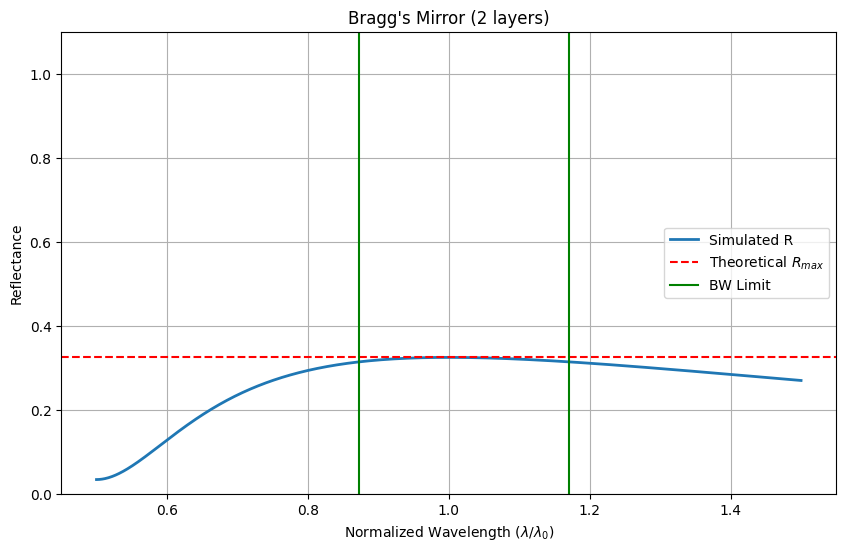

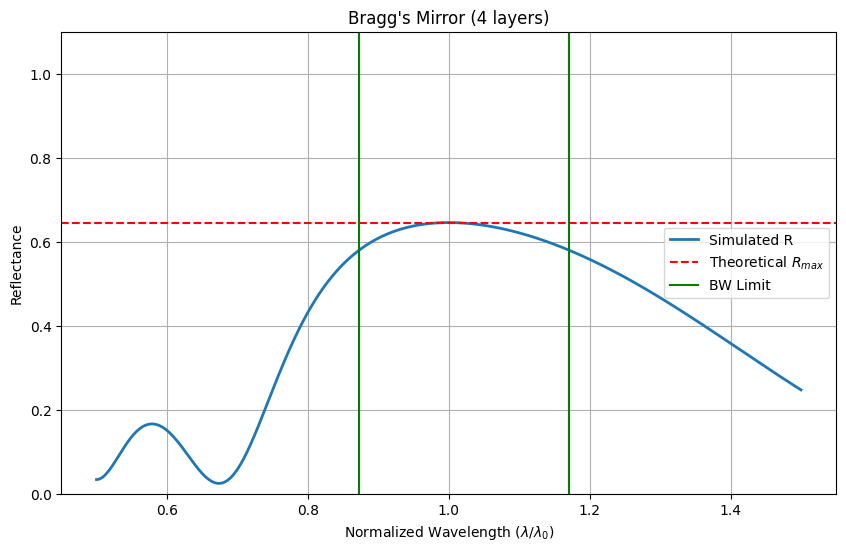

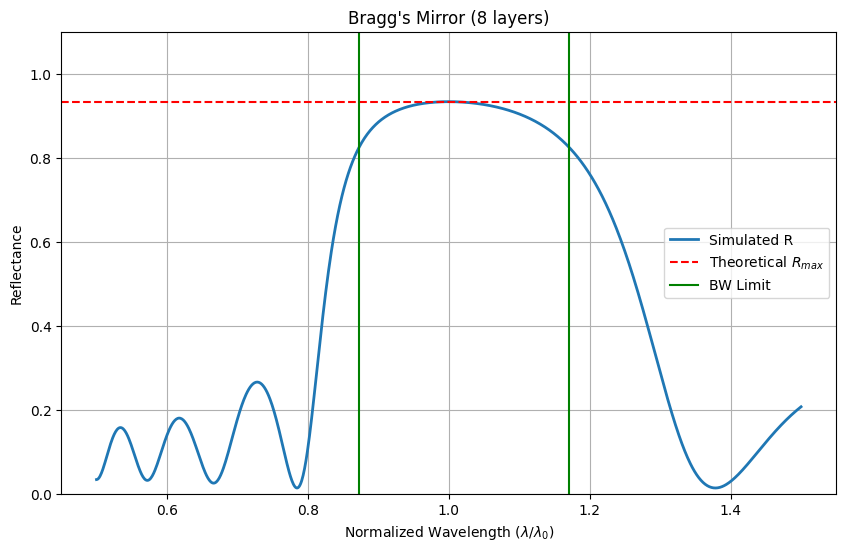

In [3]:
## Packages
import sys
sys.path.append("../Python/")
import matplotlib.pyplot as plt
from numpy import deg2rad, rad2deg
from Bragg import bragg

# Parameters
lam0 = 1.0
n_High = 2.3
n_Low = 1.45
n_inc = 1.0
n_sub = 1.45
ms = [1, 2, 4]
theta_i0 = 0
mesh_len = 1000

for m in ms:
    mesh, R, R_max, lam_BW_min, lam_BW_max = bragg(lam0, n_High, n_Low, n_inc, n_sub, m, theta_i0, mesh_len, False)

    # We handle plotting now
    plt.plot(mesh, R, label="Simulated R", linewidth=2)
    plt.axhline(R_max, color='r', linestyle='--', label=r"Theoretical $R_{max}$")
    plt.axvline(lam_BW_min, color='g', label="BW Limit")
    plt.axvline(lam_BW_max, color='g')
    plt.ylim(0, 1.1)
    plt.xlabel(r"Normalized Wavelength ($\lambda / \lambda_0$)")
    plt.ylabel("Reflectance")
    plt.legend(loc="center right")
    plt.grid(True)
    plt.title(f"Bragg's Mirror ({2*m} layers)")
    plt.savefig(f"Bragg-m={m}.jpeg", dpi=2000)

### Fabry-Pérot resonant cavity (varying layers)

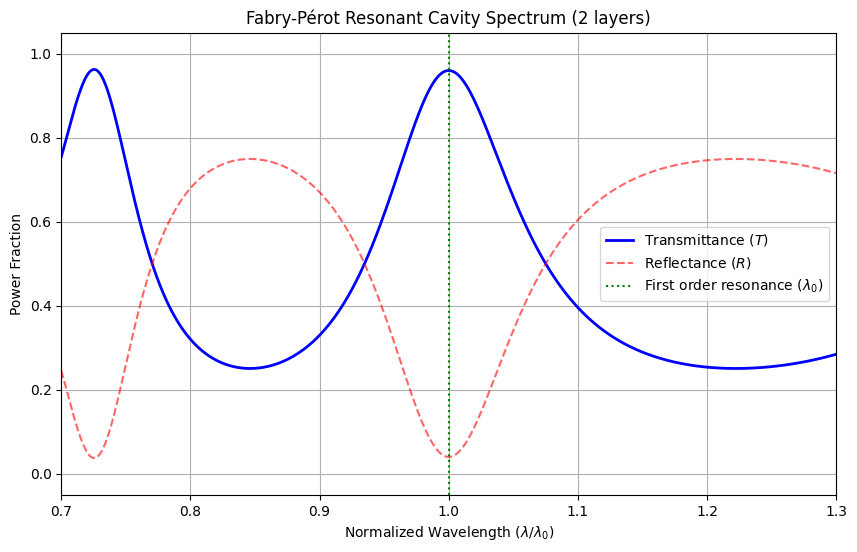

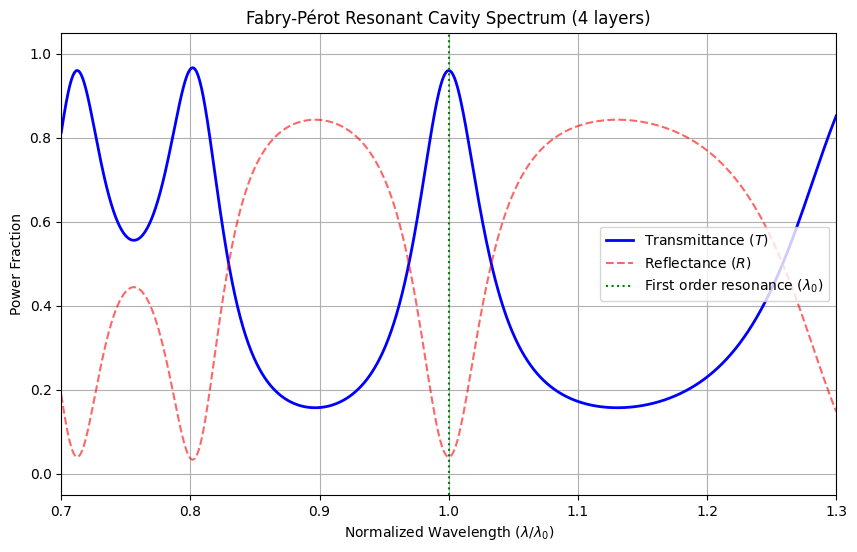

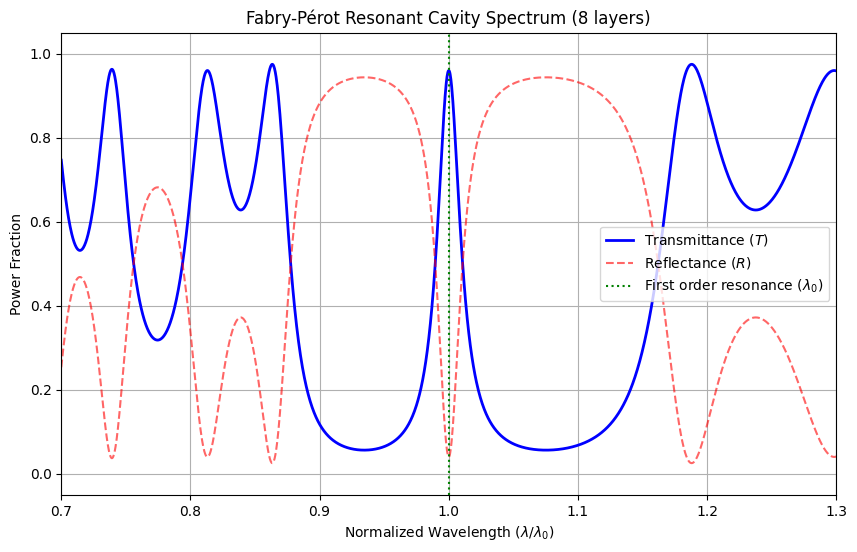

In [4]:
## Packages
import sys
sys.path.append("../Python/")
import matplotlib.pyplot as plt
from Fabry_perot import fabry_perot

# Parameters
lam0 = 1.0
n_High = 3.5
n_Low = 2.9
n_cavity = 3.5
n_inc = 1.0
n_sub = 1.5
cav_mult = 2.0
theta_i0 = 0.0
mesh_len = 2000

ms = [1, 2, 4]

for m in ms:
    mesh, lam0, T, R = fabry_perot(lam0, n_High, n_Low, n_cavity, n_inc, n_sub, m, cav_mult, theta_i0, mesh_len, False)

    # Plotting is handled here

    plt.figure(figsize=(10, 6))
    
    # Plotting Transmittance and Reflectance
    plt.plot(mesh / lam0, T, label="Transmittance ($T$)", color='blue', linewidth=2)
    plt.plot(mesh / lam0, R, label="Reflectance ($R$)", color='red', linestyle='--', alpha=0.6)
    
    # Mark the central design wavelength
    plt.axvline(1.0, color='green', linestyle=':', label=r"First order resonance ($\lambda_0$)")

    plt.ylim(-0.05, 1.05)
    plt.xlim(0.7, 1.3)
    plt.xlabel(r"Normalized Wavelength ($\lambda / \lambda_0$)")
    plt.ylabel("Power Fraction")
    plt.title(f"Fabry-Pérot Resonant Cavity Spectrum ({2*m} layers)")
    plt.legend(loc="center right")
    plt.grid(True)
    plt.savefig(f"Fabry_Perot-m={m}.jpeg", dpi=2000)